# Setup

**Imports**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)

**Utility functions**

In [6]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

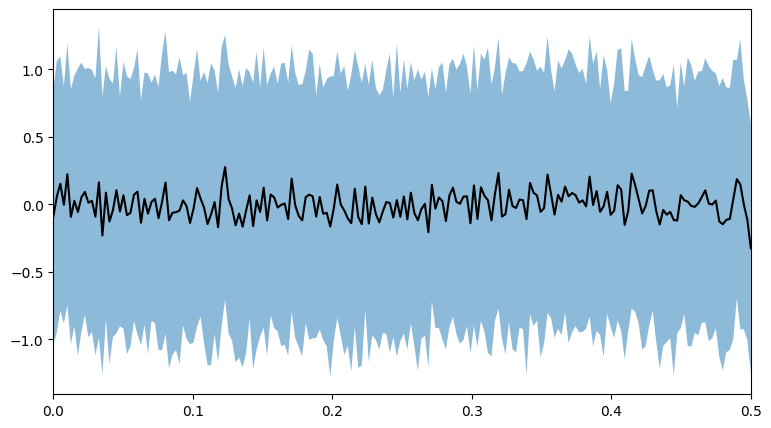

In [7]:
# This is an example of plot (random data). You can change it if you want.

## Change the following lines
periodograms = np.random.randn(100, 200)  # shape (n_trials, n_freqs)
freqs = np.linspace(0, 0.5, 200)
##


fig, ax = fig_ax(figsize=(9, 5))

avg = periodograms.mean(axis=0)
std = periodograms.std(axis=0)
ax.plot(freqs, avg, 'k-')
ax.fill_between(freqs, avg-std, avg+std, alpha=0.5)


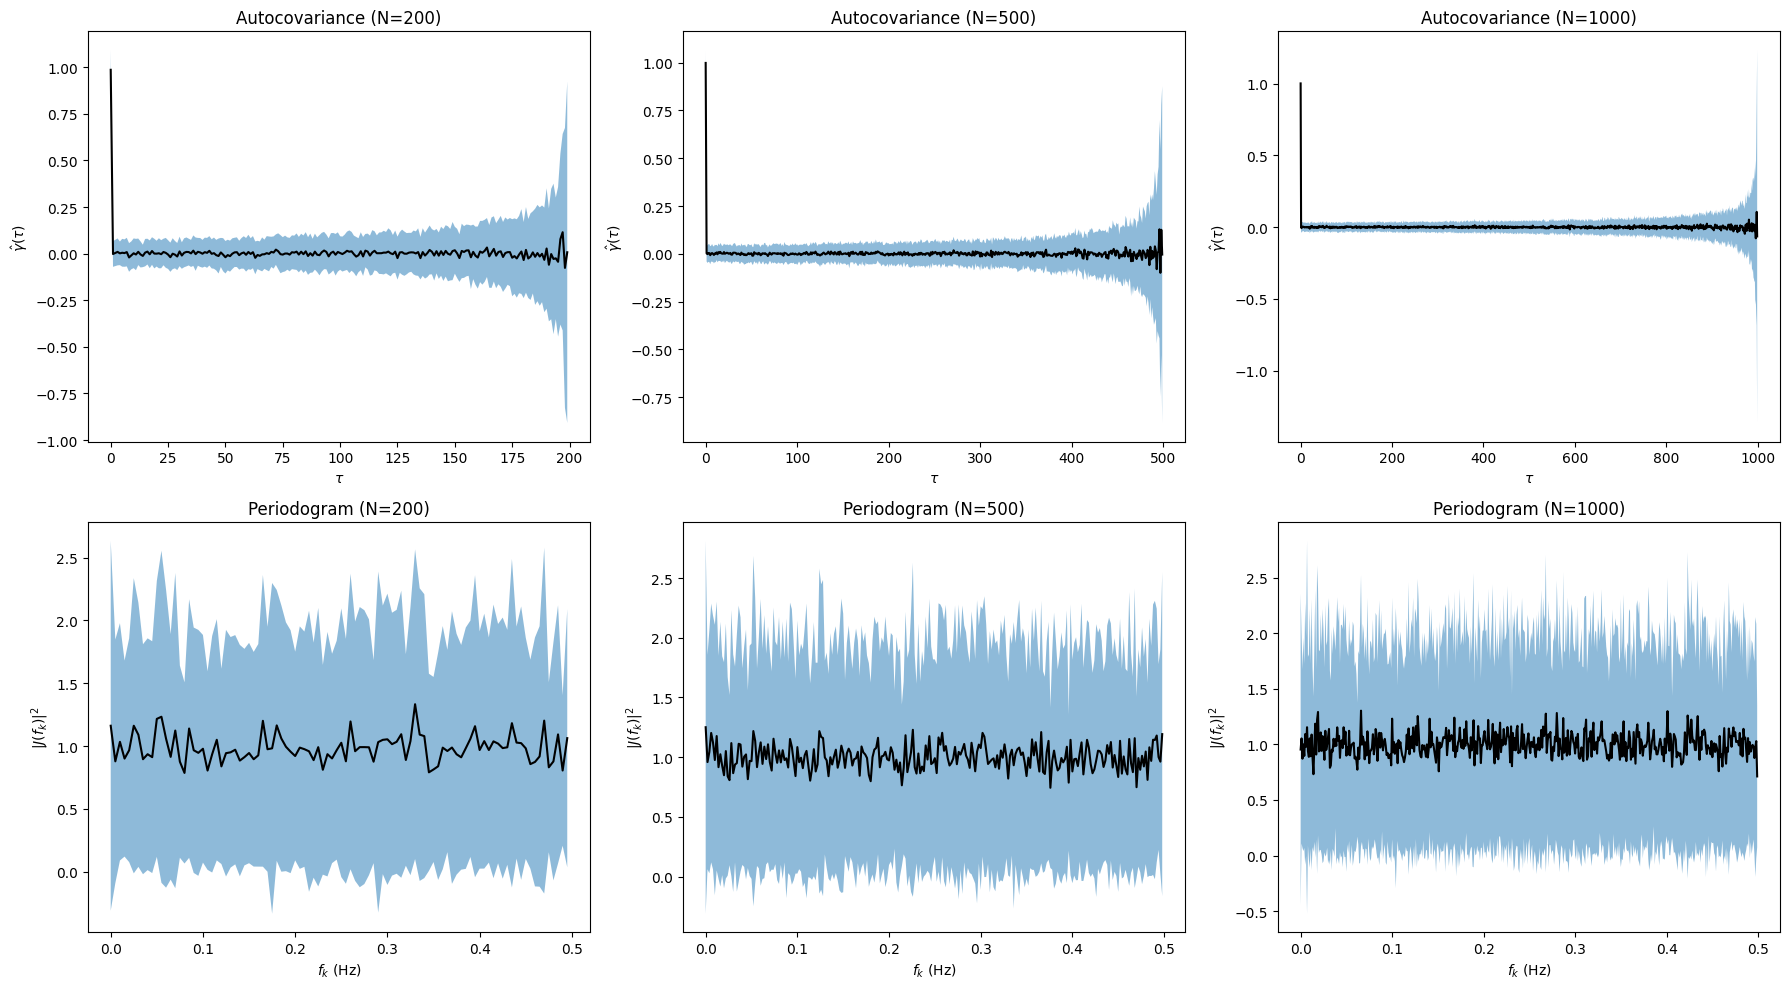

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour calculer les autocovariances
def compute_autocovariances(X, N):
    autocovariances = np.zeros(N)
    for tau in range(N):
        autocovariances[tau] = np.mean([X[n] * X[n+tau] for n in range(N-tau)])
    return autocovariances

# Fonction pour calculker le périodogramme
def compute_periodogram(X, N, fs=1.0):
    J_f = np.fft.fft(X, n=N) / np.sqrt(N)
    periodogram = np.abs(J_f[:N//2])**2 
    freqs = np.fft.fftfreq(N, d=1/fs)[:N//2]
    return periodogram, freqs

# Paramètres de la simulation
Ns = [200, 500, 1000]
num_simulations = 100
sigma2 = 1 

# plots
fig, axs = plt.subplots(2, len(Ns), figsize=(18, 10))

for idx, N in enumerate(Ns):
    autocovariances_simulations = []
    periodograms_simulations = []

    # Simulations
    for _ in range(num_simulations):
        X = np.random.normal(0, np.sqrt(sigma2), N)
        
        # autocovariances
        autocovariances = compute_autocovariances(X, N)
        autocovariances_simulations.append(autocovariances)
        
        # périodogramme
        periodogram, freqs = compute_periodogram(X, N)
        periodograms_simulations.append(periodogram)

    autocovariances_simulations = np.array(autocovariances_simulations)
    periodograms_simulations = np.array(periodograms_simulations)

    avg_autocov = autocovariances_simulations.mean(axis=0)
    std_autocov = autocovariances_simulations.std(axis=0)

    avg_periodogram = periodograms_simulations.mean(axis=0)
    std_periodogram = periodograms_simulations.std(axis=0)

    # Plot autocovariances
    axs[0, idx].plot(range(N), avg_autocov, 'k-', label='Average autocovariance')
    axs[0, idx].fill_between(range(N), avg_autocov-std_autocov, avg_autocov+std_autocov, alpha=0.5)
    axs[0, idx].set_title(f'Autocovariance (N={N})')
    axs[0, idx].set_xlabel(r'$\tau$')
    axs[0, idx].set_ylabel(r'$\hat{\gamma}(\tau)$')
    # Plot périodogrammes
    axs[1, idx].plot(freqs, avg_periodogram, 'k-', label='Average periodogram')
    axs[1, idx].fill_between(freqs, avg_periodogram-std_periodogram, avg_periodogram+std_periodogram, alpha=0.5)
    axs[1, idx].set_title(f'Periodogram (N={N})')
    axs[1, idx].set_xlabel(r'$f_k$ (Hz)')
    axs[1, idx].set_ylabel(r'$|J(f_k)|^2$')

plt.tight_layout()
plt.show()


## Question 9

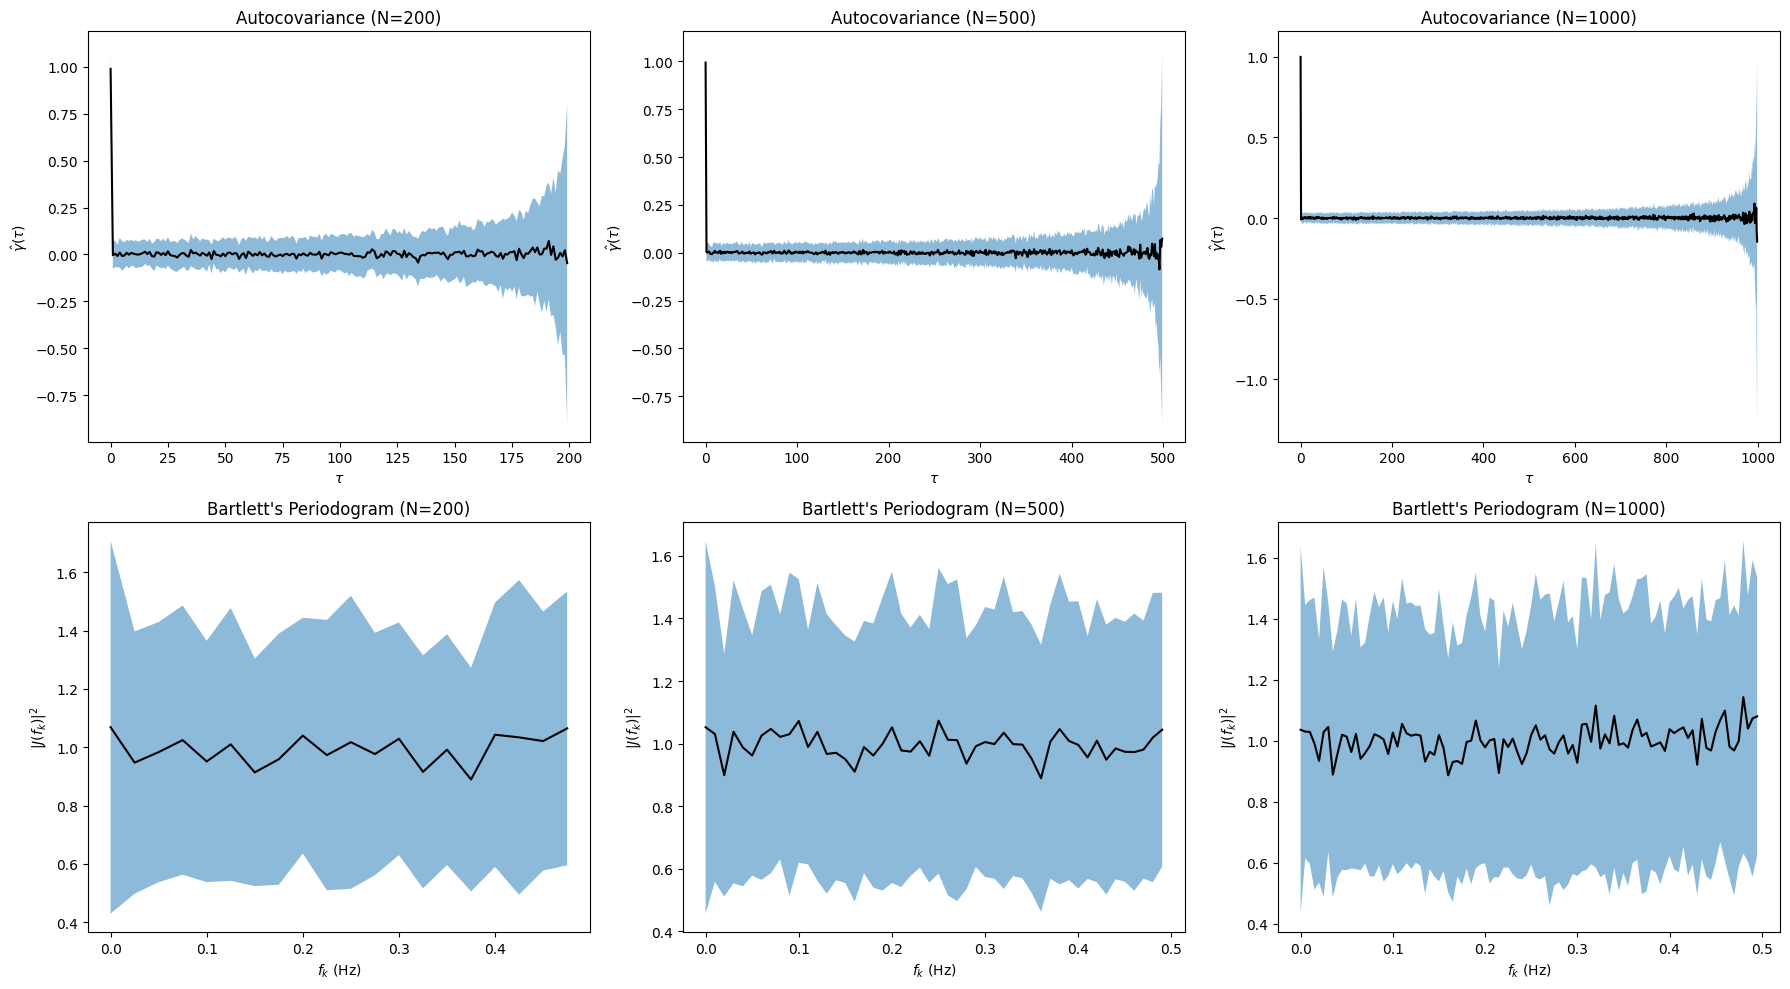

In [9]:
def compute_autocovariances(X, N):
    autocovariances = np.zeros(N)
    for tau in range(N):
        autocovariances[tau] = np.mean([X[n] * X[n+tau] for n in range(N-tau)])
    return autocovariances

# Fonction pour calculer l'estimation Barlett du périodogramme
def compute_bartlett_periodogram(X, N, K, fs=1.0):
    section_length = N // K
    periodogram_avg = np.zeros(section_length // 2)
    
    for k in range(K):
        section = X[k * section_length:(k + 1) * section_length]
        J_f = np.fft.fft(section, n=section_length) / np.sqrt(section_length)
        periodogram = np.abs(J_f[:section_length // 2])**2 
        periodogram_avg += periodogram

    periodogram_avg /= K
    freqs = np.fft.fftfreq(section_length, d=1/fs)[:section_length // 2]
    return periodogram_avg, freqs

Ns = [200, 500, 1000]
num_simulations = 100
sigma2 = 1  
K = 5  # Nombre de sections pour la méthode Barlett

# Plots
fig, axs = plt.subplots(2, len(Ns), figsize=(18, 10))

for idx, N in enumerate(Ns):
    autocovariances_simulations = []
    bartlett_periodograms_simulations = []

    # Simulations
    for _ in range(num_simulations):
        X = np.random.normal(0, np.sqrt(sigma2), N)
        
        autocovariances = compute_autocovariances(X, N)
        autocovariances_simulations.append(autocovariances)
        
        # Périodogramme Barlett
        bartlett_periodogram, freqs = compute_bartlett_periodogram(X, N, K)
        bartlett_periodograms_simulations.append(bartlett_periodogram)

    autocovariances_simulations = np.array(autocovariances_simulations)
    bartlett_periodograms_simulations = np.array(bartlett_periodograms_simulations)

    avg_autocov = autocovariances_simulations.mean(axis=0)
    std_autocov = autocovariances_simulations.std(axis=0)

    avg_bartlett_periodogram = bartlett_periodograms_simulations.mean(axis=0)
    std_bartlett_periodogram = bartlett_periodograms_simulations.std(axis=0)

    # Plot autocovariances
    axs[0, idx].plot(range(N), avg_autocov, 'k-', label='Average autocovariance')
    axs[0, idx].fill_between(range(N), avg_autocov-std_autocov, avg_autocov+std_autocov, alpha=0.5)
    axs[0, idx].set_title(f'Autocovariance (N={N})')
    axs[0, idx].set_xlabel(r'$\tau$')
    axs[0, idx].set_ylabel(r'$\hat{\gamma}(\tau)$')

    # Plot périodogrammes Barlett
    axs[1, idx].plot(freqs, avg_bartlett_periodogram, 'k-', label="Average Bartlett's periodogram")
    axs[1, idx].fill_between(freqs, avg_bartlett_periodogram-std_bartlett_periodogram, avg_bartlett_periodogram+std_bartlett_periodogram, alpha=0.5)
    axs[1, idx].set_title(f"Bartlett's Periodogram (N={N})")
    axs[1, idx].set_xlabel(r'$f_k$ (Hz)')
    axs[1, idx].set_ylabel(r'$|J(f_k)|^2$')

plt.tight_layout()
plt.show()

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [10]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

## Question 10

In [11]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import calculate_distance_matrix
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.utils.metric import type_metric, distance_metric
from sklearn.metrics import f1_score
 


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\victo\anaconda3\envs\ml_time_series\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\victo\anaconda3\envs\ml_time_series\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\victo\anaconda3\envs\ml_time_series\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io

### Preprocessing

In [12]:
from tslearn.utils import to_time_series_dataset

X_tt = to_time_series_dataset(X_train + X_test)
y_tt = y_train + y_test
n_train = len(X_train)

X_train_ts = X_tt[:n_train]  # Les premiers n_train éléments
X_test_ts = X_tt[n_train:] 
# Vérification des tailles
print("Taille de X_train_ts :", X_train_ts.shape)
print("Taille de X_test_ts :", X_test_ts.shape) 

c:\Users\victo\anaconda3\envs\ml_time_series\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Taille de X_train_ts : (168, 147, 1)
Taille de X_test_ts : (88, 147, 1)


### Training

### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from tslearn.metrics import dtw
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Fonction de distance basée sur DTW
def dtw_distance(x, y):
    return dtw(x, y)

# Définir le modèle KNN
knn = KNeighborsClassifier(metric=dtw_distance)

X_train_ts_cleaned = [np.nan_to_num(series, nan=0.0) for series in X_train_ts]
X_test_ts_cleaned = [np.nan_to_num(series, nan=0.0) for series in X_test_ts]
# Enlever la 3e dimension
X_train_ts_2d = np.squeeze(X_train_ts_cleaned, axis=2)
X_test_ts_2d = np.squeeze(X_test_ts_cleaned, axis=2)

score = []
score_test = []
nb_voisins = [k+1 for k in range(15)]
param_grid = {'n_neighbors': nb_voisins}  # Adaptez les valeurs à vos besoins

# Configurer GridSearchCV pour la recherche de l'hyperparamètre optimal avec scoring F1
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')

# Entraîner GridSearchCV
grid_search.fit(X_train_ts_2d, y_train)

# Récupérer le modèle ayant le meilleur score
best_knn_model = grid_search.best_estimator_

# Afficher le meilleur score F1
best_score = grid_search.best_score_
print("Best F1 score:", best_score)




Best F1 score: 0.776082831600073


c:\Users\victo\anaconda3\envs\ml_time_series\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# pd.DataFrame(grid_search.cv_results_).to_excel('resultat_cv.xlsx', index=False)

In [14]:
print(best_knn_model)

KNeighborsClassifier(metric=<function dtw_distance at 0x000002551DE62C00>,
                     n_neighbors=7)


In [15]:
y_pred = best_knn_model.predict(X_test_ts_2d)
f1 = f1_score(y_test,y_pred)
print(f1)

0.4864864864864865


## Question 11

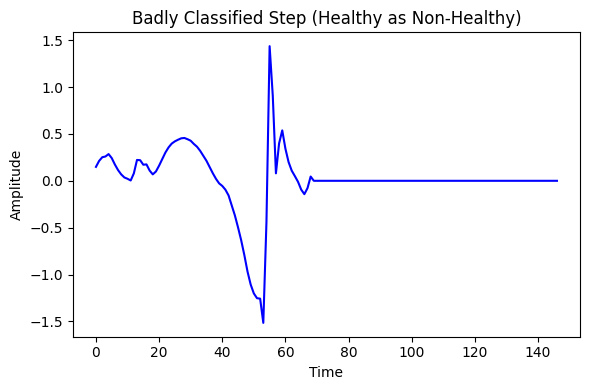

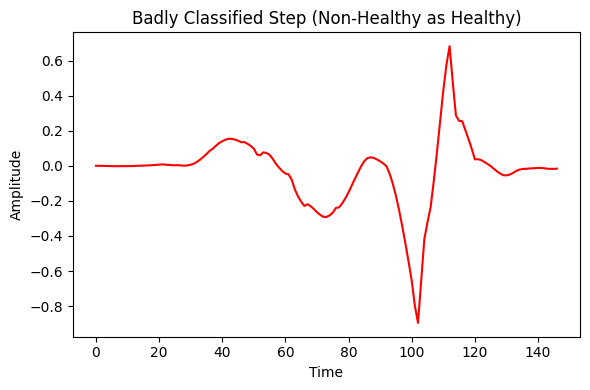

In [16]:
# Trouver les indices des pas mal classés (où y_test != y_pred)
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]

# Identifier un exemple mal classé pour chaque classe
misclassified_healthy = None  # Faux négatif (healthy classifié comme non-healthy)
misclassified_non_healthy = None  # Faux positif (non-healthy classifié comme healthy)

for i in misclassified_indices:
    if y_test[i] == 0 and misclassified_healthy is None:  # healthy mal classé
        misclassified_healthy = i
    elif y_test[i] == 1 and misclassified_non_healthy is None:  # non-healthy mal classé
        misclassified_non_healthy = i
    if misclassified_healthy is not None and misclassified_non_healthy is not None:
        break  # On arrête dès qu'on a un exemple de chaque type

# Sauvegarder et afficher chaque pas mal classé individuellement

# Pour le pas healthy mal classé
if misclassified_healthy is not None:
    plt.figure(figsize=(6, 4))
    plt.plot(X_test_ts_2d[misclassified_healthy], color='blue')
    plt.title("Badly Classified Step (Healthy as Non-Healthy)")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.savefig("badly_classified_healthy.png")  # Sauvegarde sous forme d'image
    plt.show()

# Pour le pas non-healthy mal classé
if misclassified_non_healthy is not None:
    plt.figure(figsize=(6, 4))
    plt.plot(X_test_ts_2d[misclassified_non_healthy], color='red')
    plt.title("Badly Classified Step (Non-Healthy as Healthy)")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.savefig("badly_classified_non_healthy.png")  # Sauvegarde sous forme d'image
    plt.show()